In [1]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('../processed_data/gurgaon_properties_cleaned_v1.csv')

In [11]:
df.duplicated().sum()

122

In [13]:
df.head(1)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,dlf the belaire,sector 54,10.0,24557.0,4072.158651301055,Super Built up area 4072(378.3 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),4.0,5.0,3+,servant room,17.0,North,5 to 10 Year Old,"['Sector 42-43 Metro station', 'Horizon 1 Mall', 'Golf Course Road', 'Gurgaon Faridabad Highway', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Ernst & Young', 'Ibis Hotel']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


1.  areaWithType

In [16]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
700,0.70,(98 sq.m.) Built-up Area,Built Up area: 117 (97.83 sq.m.)
2138,2.12,1250.0,Built Up area: 1852 (172.06 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.)
606,2.70,3482.0737683776115,Super Built up area 3482(323.49 sq.m.)
1246,9.00,(220 sq.m.) Plot Area,Plot area 2367(219.9 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.)
47,1.90,2010.1565806178587,Super Built up area 2010(186.74 sq.m.)


In [26]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    text = str(text)
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [28]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    text = str(text)
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [34]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    text = str(text)  # convert to string to avoid TypeError
    pattern = r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value)
    match = re.search(pattern, text)
    if match:
        sq_m_value = float(match.group(1))
        return round(sq_m_value * 10.7639, 2)
    return area_value


In [36]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [38]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2064,0.49,flat,998.1666327154206,Carpet area: 998 (92.72 sq.m.),NaN,NaN,998.0
3463,1.38,flat,2177.3430104133795,Carpet area: 2177 (202.25 sq.m.),NaN,NaN,2177.0
239,1.10,flat,2035.1526364477336,Super Built up area 2035(189.06 sq.m.)Carpet area: 1760 sq.ft. (163.51 sq.m.),2035.0,NaN,1760.0
228,4.75,house,(220 sq.m.) Plot Area,Plot area 263(219.9 sq.m.)Built Up area: 261 sq.yards (218.23 sq.m.)Carpet area: 259 sq.yards (216.56 sq.m.),NaN,261.0,259.0
248,8.10,house,(213 sq.m.) Plot Area,Plot area 255(213.21 sq.m.),NaN,NaN,NaN


In [40]:
df.duplicated().sum()

122

In [42]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [46]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,1.6,house,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
17,2.4,house,(186 sq.m.) Plot Area,Plot area 2000(185.81 sq.m.),NaN,NaN,NaN
24,11.5,house,(350 sq.m.) Plot Area,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),NaN,9000.0,6500.0
26,7.5,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
29,11.0,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.)Built Up area: 361 sq.yards (301.84 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),NaN,361.0,300.0


In [48]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sq_ft          19
area                      2
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [50]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [52]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,1.6,house,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
17,2.4,house,(186 sq.m.) Plot Area,Plot area 2000(185.81 sq.m.),NaN,NaN,NaN
26,7.5,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
40,22.0,house,(836 sq.m.) Plot Area,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
44,16.0,house,(418 sq.m.) Plot Area,Plot area 500(418.06 sq.m.),NaN,NaN,NaN


In [54]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [64]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    area_str = str(area_with_type) 
    match = re.search(r'Plot area (\d+\.?\d*)', area_str)
    return float(match.group(1)) if match else None

In [66]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [68]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,1.60,house,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
17,2.40,house,(186 sq.m.) Plot Area,Plot area 2000(185.81 sq.m.),NaN,2000.00,NaN
26,7.50,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
40,22.00,house,(836 sq.m.) Plot Area,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
44,16.00,house,(418 sq.m.) Plot Area,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
51,1.83,house,(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
52,12.00,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
59,1.25,house,(7692 sq.m.) Plot Area,Plot area 115(7692.86 sq.m.),NaN,115.00,NaN
60,6.30,house,(167 sq.m.) Plot Area,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
64,1.70,house,(167 sq.m.) Plot Area,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN


In [78]:
def convert_scale(row):
    try:
        area = float(row['area'])
        built_up = float(row['built_up_area'])

        if pd.isna(area) or pd.isna(built_up):
            return built_up

        ratio = area / built_up

        if round(ratio) == 9:
            return built_up * 9
        elif round(ratio) == 11:
            return built_up * 10.7
        else:
            return built_up

    except (ValueError, TypeError):
        return row['built_up_area']


In [80]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [82]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,1.60,house,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
17,2.40,house,(186 sq.m.) Plot Area,Plot area 2000(185.81 sq.m.),NaN,2000.00,NaN
26,7.50,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
40,22.00,house,(836 sq.m.) Plot Area,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
44,16.00,house,(418 sq.m.) Plot Area,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
51,1.83,house,(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
52,12.00,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
59,1.25,house,(7692 sq.m.) Plot Area,Plot area 115(7692.86 sq.m.),NaN,115.00,NaN
60,6.30,house,(167 sq.m.) Plot Area,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
64,1.70,house,(167 sq.m.) Plot Area,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN


In [84]:
# update the original dataframe
df.update(all_nan_df)

In [86]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sq_ft          19
area                      2
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2071
carpet_area            1860
dtype: int64

In [88]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,dlf the belaire,sector 54,10.00,24557.0,4072.158651301055,Super Built up area 4072(378.3 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),4.0,5.0,3+,servant room,17.0,North,5 to 10 Year Old,"['Sector 42-43 Metro station', 'Horizon 1 Mall', 'Golf Course Road', 'Gurgaon Faridabad Highway', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Ernst & Young', 'Ibis Hotel']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4072.0,3000.0,2800.0
1,flat,imperia the esfera,sector 37c,0.95,5703.0,1665.7899351218657,Built Up area: 1578 (146.6 sq.m.),2.0,2.0,0,servant room,17.0,NaN,Under Construction,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,NaN,NaN,1578.0,NaN
2,house,independent,sector 3,0.60,6000.0,(93 sq.m.) Built-up Area,Built Up area: 1000 (92.9 sq.m.),1.0,1.0,0,not available,1.0,NaN,undefined,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', 'Dr. Sarvejeet Singh', 'M.S Hospital', 'My Care Clinic', 'Satyam Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1000.0,NaN
3,house,u block dlf phase 3 road no 21,sector 24,1.60,29630.0,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),7.0,5.0,3+,not available,4.0,NaN,10+ Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', '

2.additionalRoom

In [91]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [95]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].fillna('').str.contains(col, case=False).astype(int)

In [97]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3664,not available,0,0,0,0,0
199,others,0,0,0,0,1
1577,study room,1,0,0,0,0
1071,"servant room,pooja room",0,1,0,1,0
2100,not available,0,0,0,0,0


In [99]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf the belaire,sector 54,10.00,24557.0,4072.158651301055,Super Built up area 4072(378.3 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),4.0,5.0,3+,servant room,17.0,North,5 to 10 Year Old,"['Sector 42-43 Metro station', 'Horizon 1 Mall', 'Golf Course Road', 'Gurgaon Faridabad Highway', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Ernst & Young', 'Ibis Hotel']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4072.0,3000.0,2800.0,0,1,0,0,0
1,flat,imperia the esfera,sector 37c,0.95,5703.0,1665.7899351218657,Built Up area: 1578 (146.6 sq.m.),2.0,2.0,0,servant room,17.0,NaN,Under Construction,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,NaN,NaN,1578.0,NaN,0,1,0,0,0
2,house,independent,sector 3,0.60,6000.0,(93 sq.m.) Built-up Area,Built Up area: 1000 (92.9 sq.m.),1.0,1.0,0,not available,1.0,NaN,undefined,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', 'Dr. Sarvejeet Singh', 'M.S Hospital', 'My Care Clinic', 'Satyam Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1000.0,NaN,0,0,0,0,0
3,house,u block dlf phase 3 road no 21,sector 24,1.60,29630.0,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),7.0,5.0,3+,not available,4.0,NaN,10+ Year Old,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafo

3.agePossession

In [102]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Jul 2024                 4
Aug 2024                 4
Jan 2025                 3
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Aug 2025                 2
Mar 2025                 2
Dec 2026                 2
Jan 2026                 2
By 2027                  2
Jul 2027                 2
Apr 2026                 2
Jun 2027                 2
Oct 2025      

In [104]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [106]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [108]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              334
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [110]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf the belaire,sector 54,10.00,24557.0,4072.158651301055,Super Built up area 4072(378.3 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),4.0,5.0,3+,servant room,17.0,North,Moderately Old,"['Sector 42-43 Metro station', 'Horizon 1 Mall', 'Golf Course Road', 'Gurgaon Faridabad Highway', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Ernst & Young', 'Ibis Hotel']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4072.0,3000.0,2800.0,0,1,0,0,0
1,flat,imperia the esfera,sector 37c,0.95,5703.0,1665.7899351218657,Built Up area: 1578 (146.6 sq.m.),2.0,2.0,0,servant room,17.0,NaN,Under Construction,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,NaN,NaN,1578.0,NaN,0,1,0,0,0
2,house,independent,sector 3,0.60,6000.0,(93 sq.m.) Built-up Area,Built Up area: 1000 (92.9 sq.m.),1.0,1.0,0,not available,1.0,NaN,Undefined,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', 'Dr. Sarvejeet Singh', 'M.S Hospital', 'My Care Clinic', 'Satyam Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1000.0,NaN,0,0,0,0,0
3,house,u block dlf phase 3 road no 21,sector 24,1.60,29630.0,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),7.0,5.0,3+,not available,4.0,NaN,Old Property,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone

4.furnishDetails

In [113]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
406,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '2 AC', '1 Chimney', '3 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
110,"['2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
3769,"['6 Fan', '1 Exhaust Fan', '8 Light', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2715,NaN,NaN
801,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [117]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+)\s+{re.escape(furnishing)}")

        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [119]:
furnishings_df.shape

(3804, 19)

In [121]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14148\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [123]:
furnishings_df.sample(5)

,Water Purifier,Exhaust Fan,Chimney,Geyser,Dining Table,AC,Sofa,Light,TV,Stove,Microwave,Modular Kitchen,Fan,Bed,Wardrobe,Curtains,Washing Machine,Fridge
2905,0,1,1,4,0,4,0,15,0,0,0,1,4,0,4,0,0,0
3439,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1591,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [129]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

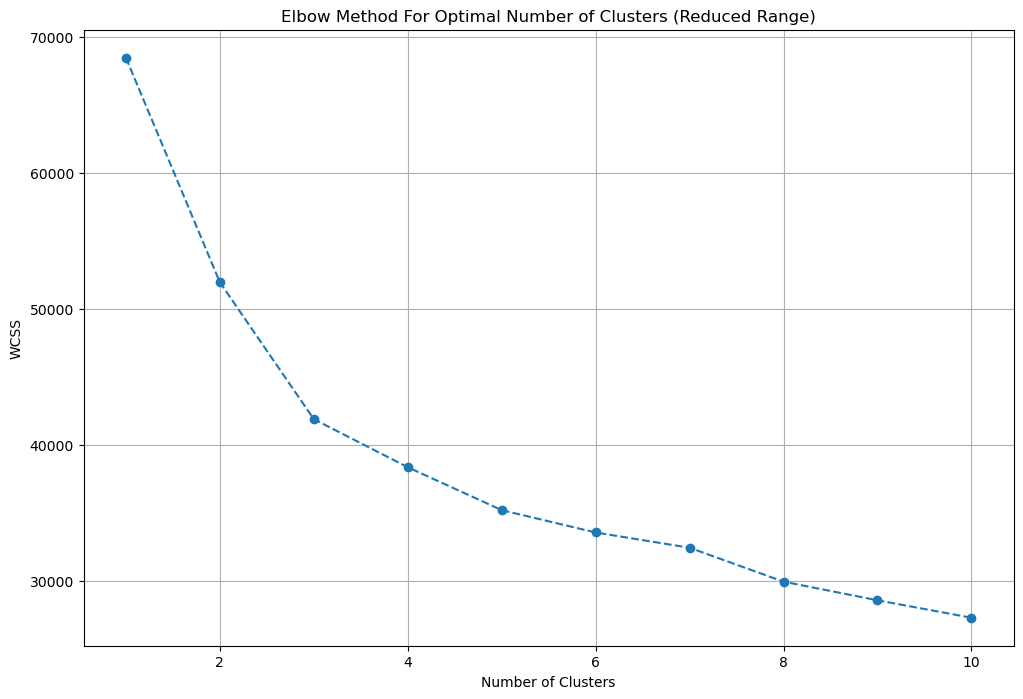

In [131]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [133]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [135]:
df = df.iloc[:,:-18]

In [137]:
df['furnishing_type'] = cluster_assignments

In [139]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3468,"['16 Wardrobe', '9 Fan', '1 Exhaust Fan', '4 Geyser', '21 Light', '1 Modular Kitchen', '5 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3307,NaN,0
1558,"['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1548,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
548,"['3 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '2 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2


5.features

In [142]:
df[['society','features']].sample(5)

,society,features
1619,dlf new town heights,"['Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
136,signature global city 92,"['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
462,la vida by tata housing,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff']"
3217,emaar palm gardens,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
531,ramprastha skyz,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [144]:
df['features'].isnull().sum()

636

In [146]:
import pandas as pd
app_df = pd.read_csv('../raw_data/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [148]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [150]:
temp_df = df[df['features'].isnull()]

In [152]:
temp_df.shape

(636, 26)

In [154]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [156]:
df.loc[temp_df.index,'features'] = x.values

In [158]:
df['features'].isnull().sum()

482

In [160]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [162]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [164]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
810,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [166]:
features_binary_df.shape

(3804, 130)

In [168]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

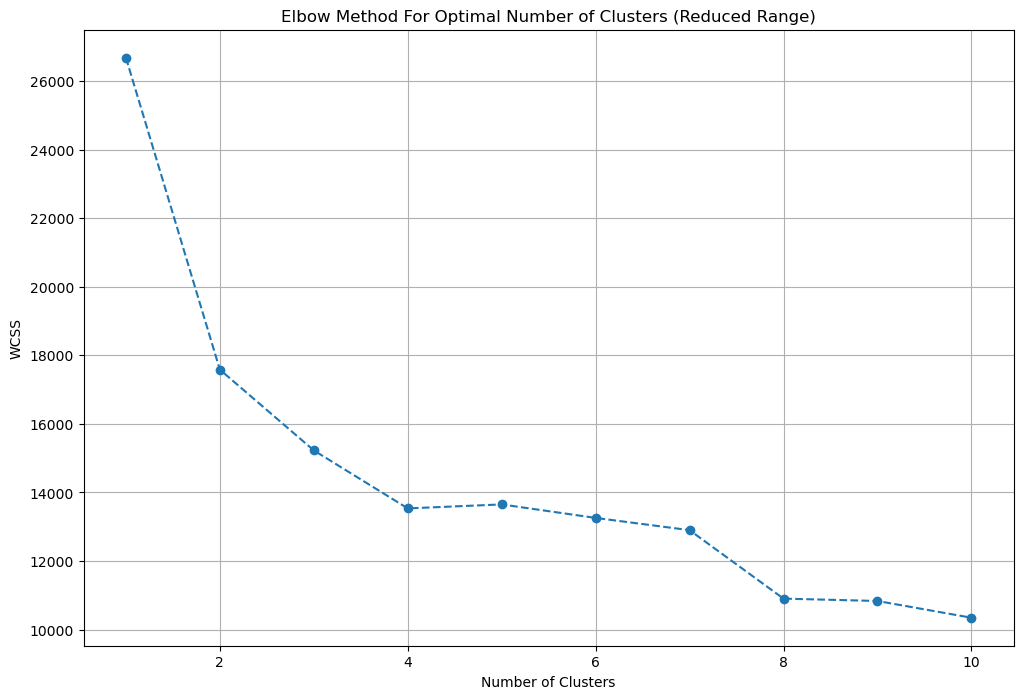

In [170]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [172]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [174]:
df['luxury_score'] = luxury_score

In [176]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,dlf the belaire,sector 54,10.00,24557.0,4072.158651301055,Super Built up area 4072(378.3 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),4.0,5.0,3+,servant room,17.0,North,Moderately Old,"['Sector 42-43 Metro station', 'Horizon 1 Mall', 'Golf Course Road', 'Gurgaon Faridabad Highway', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Ernst & Young', 'Ibis Hotel']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4072.0,3000.0,2800.0,0,1,0,0,0,1,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",167
1,flat,imperia the esfera,sector 37c,0.95,5703.0,1665.7899351218657,Built Up area: 1578 (146.6 sq.m.),2.0,2.0,0,servant room,17.0,NaN,Under Construction,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Food Court', 'Swimming Pool', 'Reading Lounge', 'Aerobics Centre', 'Restaurant', 'Water Softener Plant', 'Property Staff', 'Banquet Hall', 'Library']",NaN,1578.0,NaN,0,1,0,0,0,0,"[Food Court, Swimming Pool, Reading Lounge, Aerobics Centre, Restaurant, Water Softener Plant, Property Staff, Banquet Hall, Library]",66
2,house,independent,sector 3,0.60,6000.0,(93 sq.m.) Built-up Area,Built Up area: 1000 (92.9 sq.m.),1.0,1.0,0,not available,1.0,NaN,Undefined,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', '

In [178]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [180]:
df.sample(5)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1296,flat,m3m soulitude,sector 89,1.25,8784.0,1423.0418943533698,Carpet area: 1423 (132.2 sq.m.),3.0,3.0,2,3.0,NaN,New Property,NaN,NaN,1423.0,1,0,0,0,0,0,49
2208,flat,ss the leaf,sector 85,1.07,6524.0,1640.098099325567,Super Built up area 1640(152.36 sq.m.),2.0,2.0,3,21.0,South,Relatively New,1640.0,NaN,NaN,0,0,0,1,0,0,67
121,flat,ss the leaf,sector 85,1.25,10888.0,1148.0529022777368,Super Built up area 1741(161.74 sq.m.)Carpet area: 1148 sq.ft. (106.65 sq.m.),2.0,2.0,3+,17.0,East,Relatively New,1741.0,NaN,1148.0,0,0,1,0,0,0,156
3649,flat,dlf the skycourt,sector 86,1.56,8087.0,1929.0218869791024,Super Built up area 1929(179.21 sq.m.)Built Up area: 1580 sq.ft. (146.79 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3.0,4.0,3+,17.0,South-West,Relatively New,1929.0,1580.0,1450.0,0,0,1,0,0,0,174
3640,flat,ireo the grand arch,sector 58,3.83,21577.0,1775.0382351578069,Super Built up area 2164(201.04 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1775 sq.ft. (164.9 sq.m.),3.0,4.0,2,10.0,North-East,Relatively New,2164.0,2000.0,1775.0,1,1,0,0,0,2,174


In [182]:
df.shape

(3804, 23)

In [184]:
df.to_csv('../processed_data/gurgaon_properties_cleaned_v2.csv',index=False)